In [1]:
#merge data from several states
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import pprint
import seaborn as sns
from pprint import pprint

In [2]:
alldogs_merged = pd.read_csv('./data/alldogs_scoped_merged.csv')
state={'CA':'Los Angeles', 'MN': 'Minneapolis', 'NY':'New York', 'TX': 'Houston'}

In [3]:
len(alldogs_merged)

184542

In [4]:
alldogs_merged.head()

,id,organization_id,url,age,gender,size,coat,tags,name,status,...,attributes.declawed,attributes.special_needs,attributes.shots_current,environment.children,environment.dogs,environment.cats,contact.address.city,contact.address.state,contact.address.postcode,adoption_time
0,33853923,CA2395,https://www.petfinder.com/dog/sunny-33853923/c...,Baby,Female,Small,NaN,[],Sunny,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,19
1,33853969,CA2395,https://www.petfinder.com/dog/batman-33853969/...,Young,Male,Small,Short,[],Batman,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,29
2,34004290,CA2395,https://www.petfinder.com/dog/benji-34004290/c...,Young,Male,Medium,Short,[],Benji,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,18
3,34042721,CA2395,https://www.petfinder.com/dog/zuma-34042721/ca...,Adult,Female,Medium,Short,[],Zuma,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,57
4,34079567,CA2395,https://www.petfinder.com/dog/diego-34079567/c...,Young,Male,Medium,Medium,[],Diego,adopted,...,NaN,False,True,NaN,NaN,NaN,Los Angeles,CA,90013,8


In [206]:
alldogs_merged[alldogs_merged['contact.address.state']=='NY']['contact.address.city'].value_counts()

New York            15988
Staten Island        6022
Brooklyn             5965
Island Park          4081
Long Beach           3762
Yonkers              2437
Flushing             2271
Nyc                  2184
Ozone Park           1867
East Rockaway        1787
Manhasset             909
Port Washington       887
Mt. Vernon            671
Manhattan             543
New Hyde Park         442
Astoria               379
Valley Stream         358
Old Westbury          316
Glendale              273
Long Island City      217
Bronx                 209
Oakland Gardens       137
Far Rockaway           82
Roslyn                 43
Forest Hills           37
Garden City            36
Woodside               35
South Ozone Park       30
Fresh Meadows          20
Rego Park              10
Middle Village          9
Ridgewood               9
garden city park        6
Jamaica                 6
Malverne                4
new Hyde Park           4
BROOKLYN                3
Whitestone              2
New Rochelle

In [5]:
mean_adpt_time = {}
#create a dict with each state and average adoption time
for current_state,current_city in state.items():
    key = current_state
    val = alldogs_merged[alldogs_merged['contact.address.state'] == current_state]['adoption_time'].mean()
    mean_adpt_time[key] = val
pprint(mean_adpt_time)

{'CA': 184.01237496363595,
 'MN': 102.96562054208273,
 'NY': 227.69666935576814,
 'TX': 140.0659042704393}


In [5]:
from datetime import datetime
def get_month(date):
    z = datetime.strptime(date,"%Y-%m-%dT%H:%M:%S%z")
    return z.month

In [6]:
alldogs_merged['month'] = alldogs_merged.apply(lambda x: get_month(x['status_changed_at']), axis=1)

In [7]:
from datetime import datetime
def get_year(date):
    z = datetime.strptime(date,"%Y-%m-%dT%H:%M:%S%z")
    return z.year

In [8]:
alldogs_merged['year'] = alldogs_merged.apply(lambda x: get_year(x['status_changed_at']), axis=1)

In [9]:
alldogs_merged.head()

,id,organization_id,url,age,gender,size,coat,tags,name,status,...,attributes.shots_current,environment.children,environment.dogs,environment.cats,contact.address.city,contact.address.state,contact.address.postcode,adoption_time,month,year
0,33853923,CA2395,https://www.petfinder.com/dog/sunny-33853923/c...,Baby,Female,Small,NaN,[],Sunny,adopted,...,True,NaN,NaN,NaN,Los Angeles,CA,90013,19,12,2015
1,33853969,CA2395,https://www.petfinder.com/dog/batman-33853969/...,Young,Male,Small,Short,[],Batman,adopted,...,True,NaN,NaN,NaN,Los Angeles,CA,90013,29,12,2015
2,34004290,CA2395,https://www.petfinder.com/dog/benji-34004290/c...,Young,Male,Medium,Short,[],Benji,adopted,...,True,NaN,NaN,NaN,Los Angeles,CA,90013,18,12,2015
3,34042721,CA2395,https://www.petfinder.com/dog/zuma-34042721/ca...,Adult,Female,Medium,Short,[],Zuma,adopted,...,True,NaN,NaN,NaN,Los Angeles,CA,90013,57,2,2016
4,34079567,CA2395,https://www.petfinder.com/dog/diego-34079567/c...,Young,Male,Medium,Medium,[],Diego,adopted,...,True,NaN,NaN,NaN,Los Angeles,CA,90013,8,12,2015


In [10]:
alldogs_merged['year'].value_counts()

2010    21132
2017    19083
2016    18565
2019    18422
2015    17968
2018    17705
2014    17118
2013    16294
2012    14872
2011    12860
2009     6046
2008     2144
2007     1352
2020      921
2006       60
Name: year, dtype: int64

In [11]:
alldogs_merged.groupby('year')['adoption_time'].mean().sort_values()

year
2016     73.414059
2017     76.365089
2012     76.758136
2019     77.032733
2015     79.491374
2018     79.584242
2013     80.056278
2014     86.780699
2020     89.714441
2011     92.026516
2008    274.882463
2006    401.583333
2009    543.729739
2007    615.247781
2010    653.359691
Name: adoption_time, dtype: float64

In [12]:
alldogs_year = alldogs_merged[alldogs_merged['year'] >= 2015]

In [13]:
alldogs_year = alldogs_year[alldogs_year['year'] <= 2019]

In [14]:
len(alldogs_year)

91743

In [15]:
alldogs_year.groupby('month')['adoption_time'].mean().sort_values()

month
8     67.254053
3     71.229728
6     72.453034
11    72.882784
5     74.287535
7     75.475993
9     76.399787
2     76.894458
1     80.419748
4     84.082293
12    85.465933
10    89.175453
Name: adoption_time, dtype: float64

In [16]:
m=alldogs_year.groupby('month')['adoption_time'].mean()

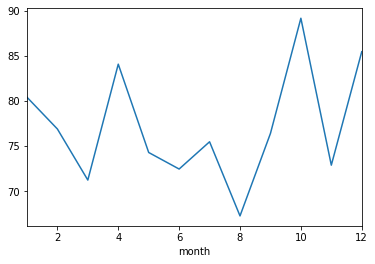

In [20]:
m.plot()

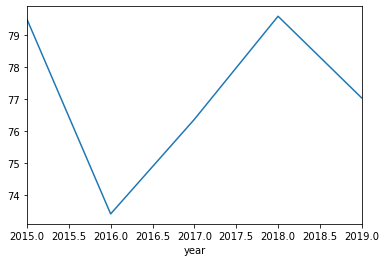

In [21]:
y=alldogs_year.groupby('year')['adoption_time'].mean()
y.plot()

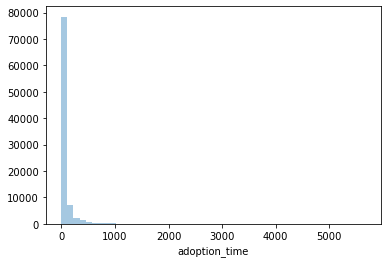

In [24]:
sns.distplot(alldogs_year['adoption_time'], kde=False)

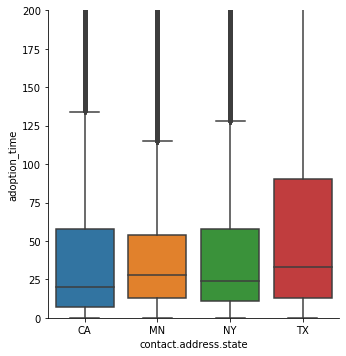

In [25]:
sizeplot3 = sns.catplot(x='contact.address.state', y='adoption_time', order=["CA", "MN", "NY", "TX"] , data=alldogs_year, kind='box');
sizeplot3.set(ylim=(0,200))

In [26]:
alldogs_year['adoption_time'].describe()

count    91743.000000
mean        77.135520
std        203.562388
min          0.000000
25%         11.000000
50%         26.000000
75%         63.000000
max       5676.000000
Name: adoption_time, dtype: float64

In [27]:
alldogs_year['log_adpt_time'] = alldogs_year.apply(lambda x: np.log((x['adoption_time'])+1.1), axis=1)

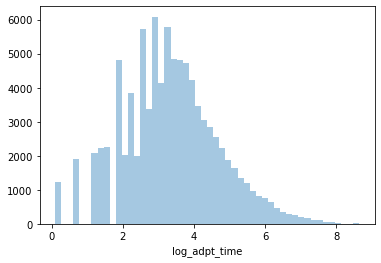

In [28]:

sns.distplot(alldogs_year['log_adpt_time'], kde=False)

In [32]:
from scipy import stats
z = (stats.zscore(alldogs_year['log_adpt_time']))
print(z)

[-0.25761797  0.04305276 -0.29561567 ... -1.64949925 -1.64949925
 -0.42284361]


In [33]:
len(np.where(z >= 2.5)[0])

1115

In [34]:
alldogs_year_otl = alldogs_year[z<2.5]
len(alldogs_year_otl)

90628

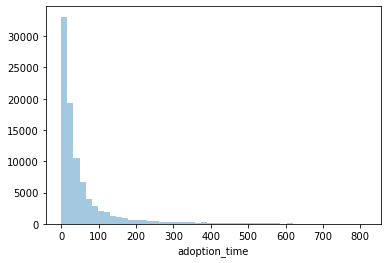

In [35]:
sns.distplot(alldogs_year_otl['adoption_time'], kde=False)

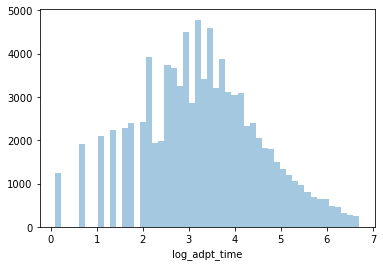

In [36]:
sns.distplot(alldogs_year_otl['log_adpt_time'], kde=False)

In [40]:
alldogs_year_otl['mod_adpt_time'] = alldogs_year_otl.apply(lambda x: np.power(((x['adoption_time'])+6),(0.2)), axis=1)

C:\anaconda_python\envs\Insight\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


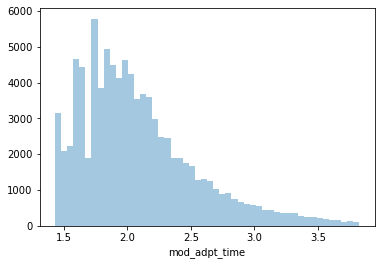

In [42]:
sns.distplot(alldogs_year_otl['mod_adpt_time'], kde=False)

In [46]:
alldogs_year_otl['logmod_adpt_time'] = alldogs_year_otl.apply(lambda x: np.log((x['adoption_time'])+100), axis=1)

C:\anaconda_python\envs\Insight\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


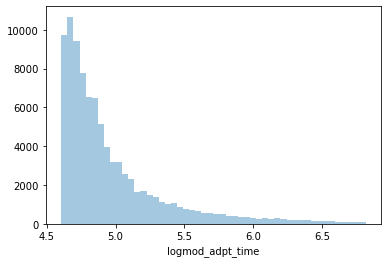

In [47]:
sns.distplot(alldogs_year_otl['logmod_adpt_time'], kde=False)

In [48]:
stats.normaltest(alldogs_year_otl['logmod_adpt_time'])

NormaltestResult(statistic=34318.16410630503, pvalue=0.0)

In [41]:
stats.normaltest(alldogs_year_otl['mod_adpt_time'])

NormaltestResult(statistic=14399.947619246293, pvalue=0.0)

In [37]:
stats.normaltest(alldogs_year_otl['adoption_time'])

NormaltestResult(statistic=69109.03824811809, pvalue=0.0)

In [38]:
stats.normaltest(alldogs_year_otl['log_adpt_time'])

NormaltestResult(statistic=104.6242001522453, pvalue=1.910484859033382e-23)

In [26]:
alldogs_year[alldogs_year['adoption_time']>2000]['status_changed_at']

1931      2019-08-07T17:49:48+0000
8833      2019-02-23T05:26:52+0000
20974     2015-01-04T13:32:05+0000
21497     2016-07-03T14:24:29+0000
24979     2016-07-10T23:17:31+0000
                    ...           
179686    2017-10-13T13:32:23+0000
180221    2017-01-05T19:30:39+0000
180342    2016-08-16T12:20:03+0000
180485    2019-11-15T01:35:47+0000
182024    2018-12-02T12:50:09+0000
Name: status_changed_at, Length: 180, dtype: object

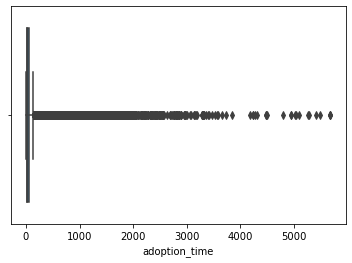

In [24]:
sns.boxplot(x=alldogs_year['adoption_time'])

In [89]:
#1 week -18%, 2 weeks = 33%, 1 month - 56%, 100 days - 85%
(len(alldogs_year_otl[alldogs_year_otl['adoption_time']<7])/len(alldogs_year_otl))*100

16.074502361301143

In [93]:
def categorize_times(time):
    if time < 7:
        return '< 1 week'
    elif time <= 14:
        return '1 - 2 weeks'
    elif time < 30:
        return '< 1 month'
    elif time < 100:
        return '< 100 days'
    else:
        return '> 100 days'

In [94]:
alldogs_year_otl['cg_adpt_time'] = alldogs_year_otl.apply(lambda x: categorize_times(x['adoption_time']), axis=1)

C:\anaconda_python\envs\Insight\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [95]:
alldogs_year_otl.head()

,id,organization_id,url,age,gender,size,coat,tags,name,status,...,contact.address.city,contact.address.state,contact.address.postcode,adoption_time,month,year,log_adpt_time,mod_adpt_time,logmod_adpt_time,cg_adpt_time
0,33853923,CA2395,https://www.petfinder.com/dog/sunny-33853923/c...,Baby,Female,Small,NaN,[],Sunny,adopted,...,Los Angeles,CA,90013,19,12,2015,3.000720,1.903654,4.779123,< 1 month
1,33853969,CA2395,https://www.petfinder.com/dog/batman-33853969/...,Young,Male,Small,Short,[],Batman,adopted,...,Los Angeles,CA,90013,29,12,2015,3.404525,2.036168,4.859812,< 1 month
2,34004290,CA2395,https://www.petfinder.com/dog/benji-34004290/c...,Young,Male,Medium,Short,[],Benji,adopted,...,Los Angeles,CA,90013,18,12,2015,2.949688,1.888175,4.770685,< 1 month
3,34042721,CA2395,https://www.petfinder.com/dog/zuma-34042721/ca...,Adult,Female,Medium,Short,[],Zuma,adopted,...,Los Angeles,CA,90013,57,2,2016,4.062166,2.290172,5.056246,< 100 days
4,34079567,CA2395,https://www.petfinder.com/dog/diego-34079567/c...,Young,Male,Medium,Medium,[],Diego,adopted,...,Los Angeles,CA,90013,8,12,2015,2.208274,1.695218,4.682131,1 - 2 weeks


In [96]:
alldogs_year_otl['cg_adpt_time'].value_counts()

< 100 days     27029
< 1 month      19809
1 - 2 weeks    15274
< 1 week       14568
> 100 days     13948
Name: cg_adpt_time, dtype: int64

In [6]:
#don't do this, it could be important
#alldogs_merged = alldogs_merged[alldogs_merged['attributes.special_needs']==False]
#len(alldogs_merged)

151513

In [97]:
alldogs_nm = alldogs_year_otl[alldogs_year_otl['gender']!='Unknown']
len(alldogs_nm)

90628

In [98]:
# Check for any missing data
print("Table size -", end=' ')
print(alldogs_nm.shape)

print("Checking for missing values..")
# Number of missing values in each column of training data
missing_val_count_by_column = (alldogs_nm.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Get names of columns with missing values
missing_cols = [col for col in alldogs_nm.columns
                     if alldogs_nm[col].isnull().any()]

Table size - (90628, 38)
Checking for missing values..
coat                    35414
breeds.secondary        52059
colors.primary          23938
colors.secondary        55765
colors.tertiary         88930
attributes.declawed     90628
environment.children    65588
environment.dogs        57343
environment.cats        75276
dtype: int64


In [120]:
#not needed for this set
#alldogs_nm = alldogs_merged.fillna({'name':'Unknown'})

In [99]:
# recheck for any missing data
print("Table size -", end=' ')
print(alldogs_nm.shape)

print("Checking for missing values..")
# Number of missing values in each column of training data
missing_val_count_by_column = (alldogs_nm.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Get names of columns with missing values
missing_cols = [col for col in alldogs_nm.columns
                     if alldogs_nm[col].isnull().any()]

Table size - (90628, 38)
Checking for missing values..
coat                    35414
breeds.secondary        52059
colors.primary          23938
colors.secondary        55765
colors.tertiary         88930
attributes.declawed     90628
environment.children    65588
environment.dogs        57343
environment.cats        75276
dtype: int64


In [100]:
alldogs_nm = alldogs_nm.drop(missing_cols, axis=1)

In [101]:
alldogs_nm.head()

,id,organization_id,url,age,gender,size,tags,name,status,status_changed_at,...,contact.address.city,contact.address.state,contact.address.postcode,adoption_time,month,year,log_adpt_time,mod_adpt_time,logmod_adpt_time,cg_adpt_time
0,33853923,CA2395,https://www.petfinder.com/dog/sunny-33853923/c...,Baby,Female,Small,[],Sunny,adopted,2015-12-11T20:50:51+0000,...,Los Angeles,CA,90013,19,12,2015,3.000720,1.903654,4.779123,< 1 month
1,33853969,CA2395,https://www.petfinder.com/dog/batman-33853969/...,Young,Male,Small,[],Batman,adopted,2015-12-21T22:23:16+0000,...,Los Angeles,CA,90013,29,12,2015,3.404525,2.036168,4.859812,< 1 month
2,34004290,CA2395,https://www.petfinder.com/dog/benji-34004290/c...,Young,Male,Medium,[],Benji,adopted,2015-12-30T01:22:04+0000,...,Los Angeles,CA,90013,18,12,2015,2.949688,1.888175,4.770685,< 1 month
3,34042721,CA2395,https://www.petfinder.com/dog/zuma-34042721/ca...,Adult,Female,Medium,[],Zuma,adopted,2016-02-12T19:13:27+0000,...,Los Angeles,CA,90013,57,2,2016,4.062166,2.290172,5.056246,< 100 days
4,34079567,CA2395,https://www.petfinder.com/dog/diego-34079567/c...,Young,Male,Medium,[],Diego,adopted,2015-12-30T01:21:59+0000,...,Los Angeles,CA,90013,8,12,2015,2.208274,1.695218,4.682131,1 - 2 weeks


In [54]:
len(alldogs_nm)

90628

In [55]:
#remove negative days error
alldogs_nm = alldogs_nm[alldogs_nm['adoption_time']>=0]

In [56]:
len(alldogs_nm)

90628

In [102]:
alldogs_nm.columns

Index(['id', 'organization_id', 'url', 'age', 'gender', 'size', 'tags', 'name',
       'status', 'status_changed_at', 'published_at', 'distance',
       'breeds.primary', 'breeds.mixed', 'breeds.unknown',
       'attributes.spayed_neutered', 'attributes.house_trained',
       'attributes.special_needs', 'attributes.shots_current',
       'contact.address.city', 'contact.address.state',
       'contact.address.postcode', 'adoption_time', 'month', 'year',
       'log_adpt_time', 'mod_adpt_time', 'logmod_adpt_time', 'cg_adpt_time'],
      dtype='object')

In [103]:
namelist = alldogs_nm['name'].value_counts()
namelist.head()

Bella    273
Max      261
Lucy     252
Daisy    237
Buddy    234
Name: name, dtype: int64

In [104]:
namelist[alldogs_nm['name'].iloc[89983]]/namelist.max()

0.21978021978021978

In [105]:
maxname = namelist.max()

In [106]:
alldogs_nm[alldogs_nm['name'].isnull()]

,id,organization_id,url,age,gender,size,tags,name,status,status_changed_at,...,contact.address.city,contact.address.state,contact.address.postcode,adoption_time,month,year,log_adpt_time,mod_adpt_time,logmod_adpt_time,cg_adpt_time


In [107]:
def get_norm_name_freq(name):
    return namelist[name]/maxname
get_norm_name_freq(alldogs_nm['name'].iloc[0])

0.21978021978021978

In [108]:
alldogs_nm['norm_name_freq'] = alldogs_nm.apply(lambda x: get_norm_name_freq(x['name']), axis=1)
alldogs_nm.head()

,id,organization_id,url,age,gender,size,tags,name,status,status_changed_at,...,contact.address.state,contact.address.postcode,adoption_time,month,year,log_adpt_time,mod_adpt_time,logmod_adpt_time,cg_adpt_time,norm_name_freq
0,33853923,CA2395,https://www.petfinder.com/dog/sunny-33853923/c...,Baby,Female,Small,[],Sunny,adopted,2015-12-11T20:50:51+0000,...,CA,90013,19,12,2015,3.000720,1.903654,4.779123,< 1 month,0.219780
1,33853969,CA2395,https://www.petfinder.com/dog/batman-33853969/...,Young,Male,Small,[],Batman,adopted,2015-12-21T22:23:16+0000,...,CA,90013,29,12,2015,3.404525,2.036168,4.859812,< 1 month,0.109890
2,34004290,CA2395,https://www.petfinder.com/dog/benji-34004290/c...,Young,Male,Medium,[],Benji,adopted,2015-12-30T01:22:04+0000,...,CA,90013,18,12,2015,2.949688,1.888175,4.770685,< 1 month,0.267399
3,34042721,CA2395,https://www.petfinder.com/dog/zuma-34042721/ca...,Adult,Female,Medium,[],Zuma,adopted,2016-02-12T19:13:27+0000,...,CA,90013,57,2,2016,4.062166,2.290172,5.056246,< 100 days,0.025641
4,34079567,CA2395,https://www.petfinder.com/dog/diego-34079567/c...,Young,Male,Medium,[],Diego,adopted,2015-12-30T01:21:59+0000,...,CA,90013,8,12,2015,2.208274,1.695218,4.682131,1 - 2 weeks,0.095238


In [109]:
breedlist = alldogs_nm['breeds.primary'].value_counts()
breedlist.head()

Labrador Retriever     10044
Chihuahua               7097
German Shepherd Dog     5243
Terrier                 4985
Pit Bull Terrier        4134
Name: breeds.primary, dtype: int64

In [189]:
len(breedlist)

236

In [ ]:
breedlist.to_csv('names.csv', header=False, index=True)

In [110]:
def get_norm_breed_freq(breed):
    return breedlist[breed]/breedlist.max()
alldogs_nm['breeds.primary'].iloc[0]
get_norm_breed_freq(alldogs_nm['breeds.primary'].iloc[0])

0.4963162086818001

In [111]:
alldogs_nm['norm_breed_freq'] = alldogs_nm.apply(lambda x: get_norm_breed_freq(x['breeds.primary']), axis=1)
alldogs_nm.head()

,id,organization_id,url,age,gender,size,tags,name,status,status_changed_at,...,contact.address.postcode,adoption_time,month,year,log_adpt_time,mod_adpt_time,logmod_adpt_time,cg_adpt_time,norm_name_freq,norm_breed_freq
0,33853923,CA2395,https://www.petfinder.com/dog/sunny-33853923/c...,Baby,Female,Small,[],Sunny,adopted,2015-12-11T20:50:51+0000,...,90013,19,12,2015,3.000720,1.903654,4.779123,< 1 month,0.219780,0.496316
1,33853969,CA2395,https://www.petfinder.com/dog/batman-33853969/...,Young,Male,Small,[],Batman,adopted,2015-12-21T22:23:16+0000,...,90013,29,12,2015,3.404525,2.036168,4.859812,< 1 month,0.109890,0.057746
2,34004290,CA2395,https://www.petfinder.com/dog/benji-34004290/c...,Young,Male,Medium,[],Benji,adopted,2015-12-30T01:22:04+0000,...,90013,18,12,2015,2.949688,1.888175,4.770685,< 1 month,0.267399,0.018419
3,34042721,CA2395,https://www.petfinder.com/dog/zuma-34042721/ca...,Adult,Female,Medium,[],Zuma,adopted,2016-02-12T19:13:27+0000,...,90013,57,2,2016,4.062166,2.290172,5.056246,< 100 days,0.025641,0.001195
4,34079567,CA2395,https://www.petfinder.com/dog/diego-34079567/c...,Young,Male,Medium,[],Diego,adopted,2015-12-30T01:21:59+0000,...,90013,8,12,2015,2.208274,1.695218,4.682131,1 - 2 weeks,0.095238,0.496316


In [112]:
alldogs_nm['norm_name_freq'].describe()

count    90628.000000
mean         0.099114
std          0.162752
min          0.003663
25%          0.003663
50%          0.029304
75%          0.124542
max          1.000000
Name: norm_name_freq, dtype: float64

In [113]:
pd.qcut(alldogs_nm['norm_name_freq'], q=[0, 0.33, 0.67, 1], labels = ['Low', 'Medium', 'High'])

0           High
1           High
2           High
3         Medium
4           High
           ...  
184384      High
184385      High
184386    Medium
184387       Low
184388    Medium
Name: norm_name_freq, Length: 90628, dtype: category
Categories (3, object): [Low < Medium < High]

In [114]:
alldogs_nm['name_pop'] = pd.qcut(alldogs_nm['norm_name_freq'], q=[0, 0.33, 0.67, 1], labels = ['Low', 'Medium', 'High'])

In [115]:
alldogs_nm['name_pop'].value_counts()

Low       33137
High      29506
Medium    27985
Name: name_pop, dtype: int64

In [116]:
alldogs_nm['breed_pop'] = pd.qcut(alldogs_nm['norm_breed_freq'], q=[0, 0.33, 0.67, 1], labels = ['Low', 'Medium', 'High'])
alldogs_nm['breed_pop'].value_counts()

Medium    33279
Low       29980
High      27369
Name: breed_pop, dtype: int64

In [117]:
alldogs_nm.groupby('breed_pop')['adoption_time'].mean().sort_values()

breed_pop
High      57.582155
Low       60.043462
Medium    61.293218
Name: adoption_time, dtype: float64

In [118]:
alldogs_nm.groupby('name_pop')['adoption_time'].mean().sort_values()

name_pop
Medium    54.755297
Low       61.811087
High      62.200400
Name: adoption_time, dtype: float64

In [190]:
alldogs_nm.head()

,id,organization_id,url,age,gender,size,tags,name,status,status_changed_at,...,month,year,log_adpt_time,mod_adpt_time,logmod_adpt_time,cg_adpt_time,norm_name_freq,norm_breed_freq,name_pop,breed_pop
0,33853923,CA2395,https://www.petfinder.com/dog/sunny-33853923/c...,Baby,Female,Small,[],Sunny,adopted,2015-12-11T20:50:51+0000,...,12,2015,3.000720,1.903654,4.779123,< 1 month,0.219780,0.496316,High,High
1,33853969,CA2395,https://www.petfinder.com/dog/batman-33853969/...,Young,Male,Small,[],Batman,adopted,2015-12-21T22:23:16+0000,...,12,2015,3.404525,2.036168,4.859812,< 1 month,0.109890,0.057746,High,Low
2,34004290,CA2395,https://www.petfinder.com/dog/benji-34004290/c...,Young,Male,Medium,[],Benji,adopted,2015-12-30T01:22:04+0000,...,12,2015,2.949688,1.888175,4.770685,< 1 month,0.267399,0.018419,High,Low
3,34042721,CA2395,https://www.petfinder.com/dog/zuma-34042721/ca...,Adult,Female,Medium,[],Zuma,adopted,2016-02-12T19:13:27+0000,...,2,2016,4.062166,2.290172,5.056246,< 100 days,0.025641,0.001195,Medium,Low
4,34079567,CA2395,https://www.petfinder.com/dog/diego-34079567/c...,Young,Male,Medium,[],Diego,adopted,2015-12-30T01:21:59+0000,...,12,2015,2.208274,1.695218,4.682131,1 - 2 weeks,0.095238,0.496316,High,High


In [199]:
breedsdf = alldogs_nm.loc[:,['breeds.primary','breed_pop']]
breedsdf.head()

,breeds.primary,breed_pop
0,Terrier,High
1,Rat Terrier,Low
2,Parson Russell Terrier,Low
3,Xoloitzcuintli / Mexican Hairless,Low
4,Terrier,High


In [202]:
breedsdf = breedsdf.drop_duplicates()

In [204]:
breedsdf.to_csv('breedlist.csv', header=False, index=False)

In [137]:
# change XL to Large for ease of access
test2 = alldogs_nm
test2.head()

,id,organization_id,url,age,gender,size,tags,name,status,status_changed_at,...,month,year,log_adpt_time,mod_adpt_time,logmod_adpt_time,cg_adpt_time,norm_name_freq,norm_breed_freq,name_pop,breed_pop
0,33853923,CA2395,https://www.petfinder.com/dog/sunny-33853923/c...,Baby,Female,Small,[],Sunny,adopted,2015-12-11T20:50:51+0000,...,12,2015,3.000720,1.903654,4.779123,< 1 month,0.219780,0.496316,High,High
1,33853969,CA2395,https://www.petfinder.com/dog/batman-33853969/...,Young,Male,Small,[],Batman,adopted,2015-12-21T22:23:16+0000,...,12,2015,3.404525,2.036168,4.859812,< 1 month,0.109890,0.057746,High,Low
2,34004290,CA2395,https://www.petfinder.com/dog/benji-34004290/c...,Young,Male,Medium,[],Benji,adopted,2015-12-30T01:22:04+0000,...,12,2015,2.949688,1.888175,4.770685,< 1 month,0.267399,0.018419,High,Low
3,34042721,CA2395,https://www.petfinder.com/dog/zuma-34042721/ca...,Adult,Female,Medium,[],Zuma,adopted,2016-02-12T19:13:27+0000,...,2,2016,4.062166,2.290172,5.056246,< 100 days,0.025641,0.001195,Medium,Low
4,34079567,CA2395,https://www.petfinder.com/dog/diego-34079567/c...,Young,Male,Medium,[],Diego,adopted,2015-12-30T01:21:59+0000,...,12,2015,2.208274,1.695218,4.682131,1 - 2 weeks,0.095238,0.496316,High,High


In [152]:
test2.loc[test2['size'] == 'Extra Large', 'size'] = 'Large'

In [153]:
test2[test2['size'] == 'Extra Large']

,id,organization_id,url,age,gender,size,tags,name,status,status_changed_at,...,month,year,log_adpt_time,mod_adpt_time,logmod_adpt_time,cg_adpt_time,norm_name_freq,norm_breed_freq,name_pop,breed_pop


In [154]:
alldogs_nm.loc[alldogs_nm['size'] == 'Extra Large', 'size'] = 'Large'

In [155]:
alldogs_nm.columns

Index(['id', 'organization_id', 'url', 'age', 'gender', 'size', 'tags', 'name',
       'status', 'status_changed_at', 'published_at', 'distance',
       'breeds.primary', 'breeds.mixed', 'breeds.unknown',
       'attributes.spayed_neutered', 'attributes.house_trained',
       'attributes.special_needs', 'attributes.shots_current',
       'contact.address.city', 'contact.address.state',
       'contact.address.postcode', 'adoption_time', 'month', 'year',
       'log_adpt_time', 'mod_adpt_time', 'logmod_adpt_time', 'cg_adpt_time',
       'norm_name_freq', 'norm_breed_freq', 'name_pop', 'breed_pop'],
      dtype='object')

In [156]:
X_features = ['id','age', 'gender', 'size', 'breeds.primary',
              'breeds.mixed', 'attributes.spayed_neutered', 'attributes.house_trained',
              'attributes.special_needs', 'attributes.shots_current', 'contact.address.state', 
              'name_pop', 'breed_pop', 'month']
X = alldogs_nm[X_features]
X.head()

,id,age,gender,size,breeds.primary,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state,name_pop,breed_pop,month
0,33853923,Baby,Female,Small,Terrier,True,True,True,False,True,CA,High,High,12
1,33853969,Young,Male,Small,Rat Terrier,False,True,True,False,True,CA,High,Low,12
2,34004290,Young,Male,Medium,Parson Russell Terrier,False,True,False,False,True,CA,High,Low,12
3,34042721,Adult,Female,Medium,Xoloitzcuintli / Mexican Hairless,False,True,False,False,True,CA,Medium,Low,2
4,34079567,Young,Male,Medium,Terrier,True,True,False,False,True,CA,High,High,12


In [21]:
X['age'].value_counts()

Young     55488
Baby      51911
Adult     40256
Senior     3829
Name: age, dtype: int64

In [22]:
X['gender'].value_counts()

Male      76377
Female    75107
Name: gender, dtype: int64

In [23]:
X['size'].value_counts()

Medium         60828
Small          58982
Large          29530
Extra Large     2144
Name: size, dtype: int64

In [24]:
X['contact.address.state'].value_counts()

NY    40526
TX    38231
MN    36721
CA    36006
Name: contact.address.state, dtype: int64

In [78]:
test = alldogs_merged['name'].value_counts()

Bella          499
Max            441
Lucy           438
Daisy          436
Buddy          416
Charlie        394
Jack           337
Molly          335
Lola           312
Bear           280
Bailey         276
Ginger         274
Rocky          262
Penny          258
Toby           252
Maggie         252
Luna           246
Sadie          243
Coco           242
Rosie          238
Lady           237
Sophie         233
Duke           230
Lucky          216
Lily           214
Teddy          210
Ruby           207
Stella         205
Cooper         203
Princess       202
              ... 
Cheerio         11
SKY             11
FOXY            11
ELLA            11
Val             11
Carrot          11
Jess            11
Davis           11
Cherub          11
Jeter           11
Pinkie          11
ROMEO           11
Kimmie          11
Little Bear     11
OREO            11
Jazmine         11
Cadence         11
Alana           11
Monet           11
Barnie          11
Suzie Q         11
Muneca      

In [79]:
test.to_csv('names.csv', header=False, index=True)

In [121]:
X.head()

,id,age,gender,size,breeds.primary,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state,name_pop,breed_pop,month
0,33853923,Baby,Female,Small,Terrier,True,True,True,False,True,CA,High,High,12
1,33853969,Young,Male,Small,Rat Terrier,False,True,True,False,True,CA,High,Low,12
2,34004290,Young,Male,Medium,Parson Russell Terrier,False,True,False,False,True,CA,High,Low,12
3,34042721,Adult,Female,Medium,Xoloitzcuintli / Mexican Hairless,False,True,False,False,True,CA,Medium,Low,2
4,34079567,Young,Male,Medium,Terrier,True,True,False,False,True,CA,High,High,12


In [157]:
y = alldogs_nm['cg_adpt_time']

In [123]:
len(X)

90628

In [124]:
cat_col = ['age','gender','size','contact.address.state', 'name_pop', 'breed_pop', 'month']

In [125]:
X[cat_col]=X[cat_col].astype('category')

C:\anaconda_python\envs\Insight\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [162]:
total = pd.concat([X,y], axis=1)
total.head()

,id,age,gender,size,breeds.primary,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state,name_pop,breed_pop,month,cg_adpt_time
0,33853923,Baby,Female,Small,Terrier,True,True,True,False,True,CA,High,High,12,< 1 month
1,33853969,Young,Male,Small,Rat Terrier,False,True,True,False,True,CA,High,Low,12,< 1 month
2,34004290,Young,Male,Medium,Parson Russell Terrier,False,True,False,False,True,CA,High,Low,12,< 1 month
3,34042721,Adult,Female,Medium,Xoloitzcuintli / Mexican Hairless,False,True,False,False,True,CA,Medium,Low,2,< 100 days
4,34079567,Young,Male,Medium,Terrier,True,True,False,False,True,CA,High,High,12,1 - 2 weeks


In [127]:
len(total)

90628

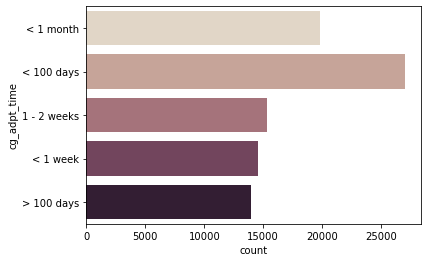

In [165]:
timeplot = sns.countplot(y='cg_adpt_time', data=total, palette="ch:.25")

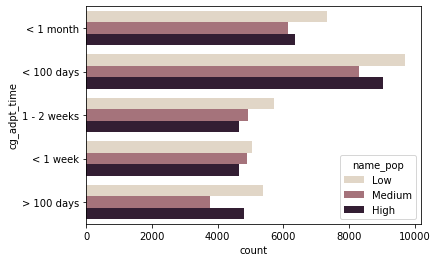

In [166]:
nameplot = sns.countplot(y='cg_adpt_time', hue='name_pop', data=total, palette="ch:.25")

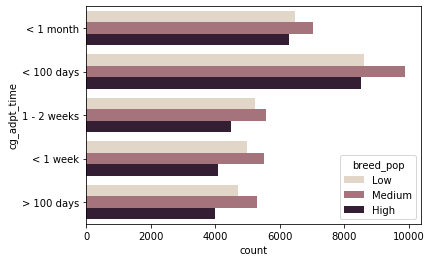

In [167]:
breedplot = sns.countplot(y='cg_adpt_time', hue='breed_pop', data=total, palette="ch:.25")

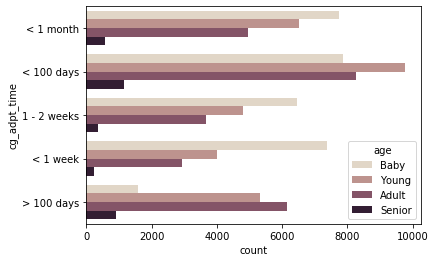

In [168]:
ageplot = sns.countplot(y='cg_adpt_time', hue='age', data=total, palette="ch:.25")

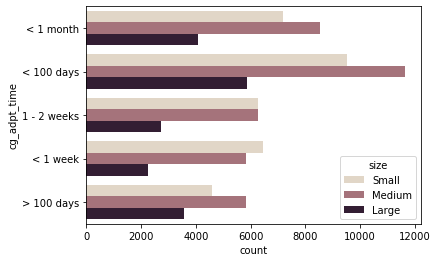

In [169]:
ageplot = sns.countplot(y='cg_adpt_time', hue='size', data=total, palette="ch:.25")

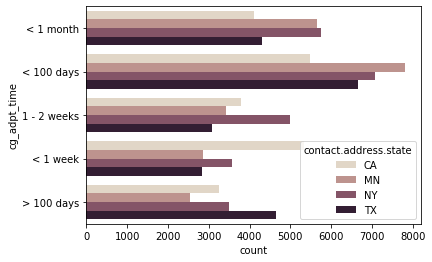

In [170]:
ageplot = sns.countplot(y='cg_adpt_time', hue='contact.address.state', data=total, palette="ch:.25")

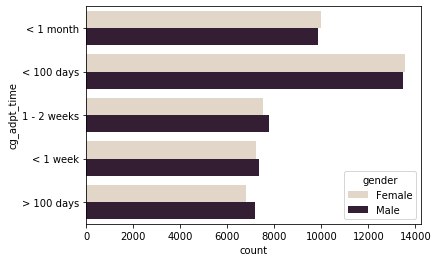

In [171]:
ageplot = sns.countplot(y='cg_adpt_time', hue='gender', data=total, palette="ch:.25")

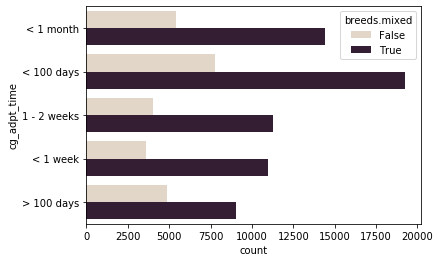

In [172]:
ageplot = sns.countplot(y='cg_adpt_time', hue='breeds.mixed', data=total, palette="ch:.25")

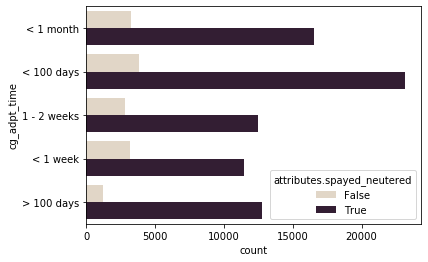

In [173]:
ageplot = sns.countplot(y='cg_adpt_time', hue='attributes.spayed_neutered', data=total, palette="ch:.25")

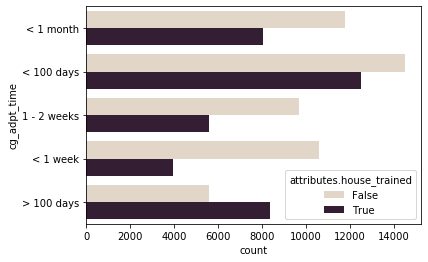

In [174]:
ageplot = sns.countplot(y='cg_adpt_time', hue='attributes.house_trained', data=total, palette="ch:.25")

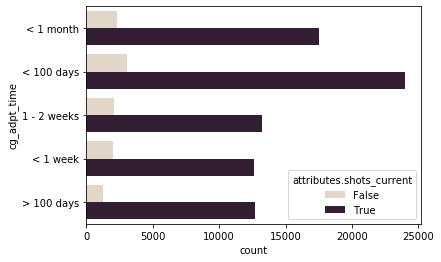

In [175]:
ageplot = sns.countplot(y='cg_adpt_time', hue='attributes.shots_current', data=total, palette="ch:.25")

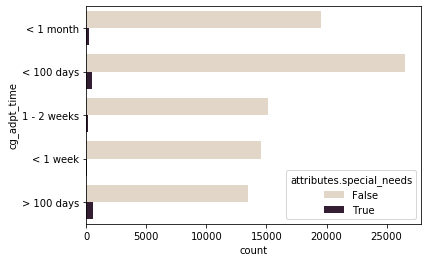

In [176]:
ageplot = sns.countplot(y='cg_adpt_time', hue='attributes.special_needs', data=total, palette="ch:.25")

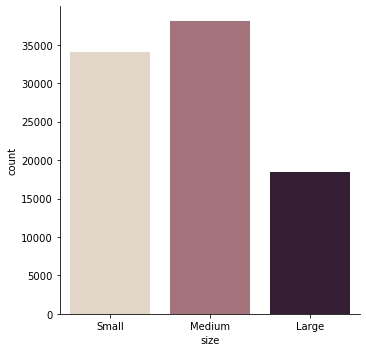

In [177]:
sns.catplot(x="size", kind="count", palette="ch:.25", data=total);

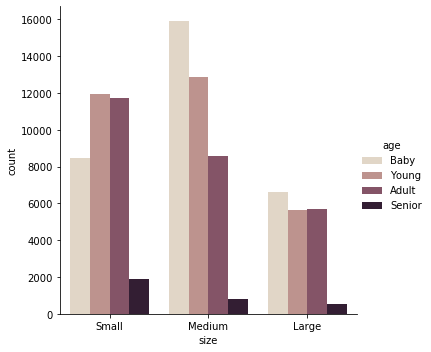

In [178]:
sns.catplot(x="size", kind="count", hue="age", palette="ch:.25", data=total);

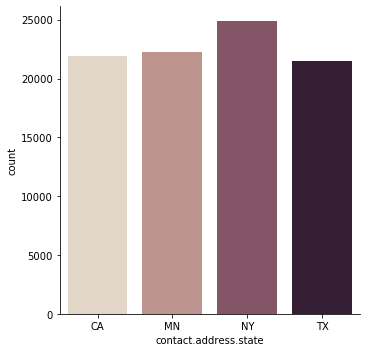

In [179]:
sns.catplot(x="contact.address.state", kind="count", palette="ch:.25", data=total);

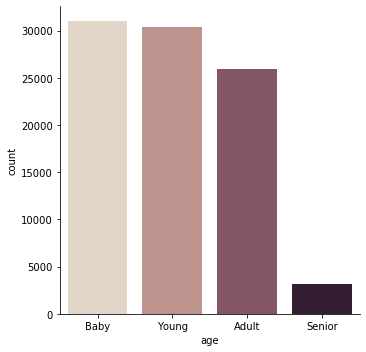

In [180]:
sns.catplot(x="age", kind="count", palette="ch:.25",order=["Baby", "Young", "Adult", "Senior"], data=total);

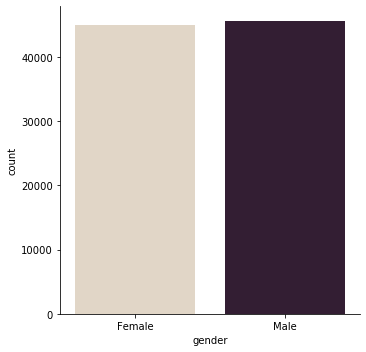

In [181]:
sns.catplot(x="gender", kind="count", palette="ch:.25", data=total);

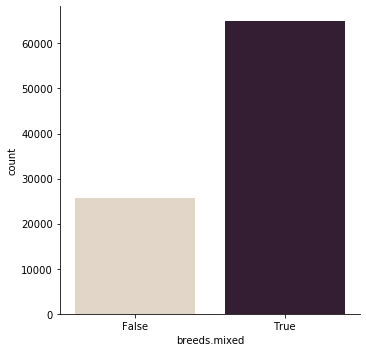

In [182]:
sns.catplot(x="breeds.mixed", kind="count", palette="ch:.25", data=total);

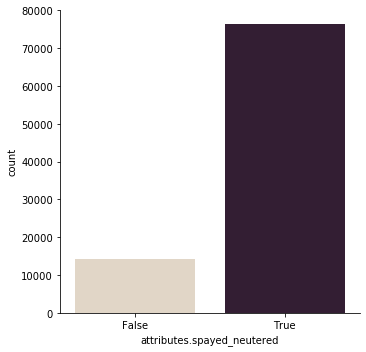

In [183]:
sns.catplot(x="attributes.spayed_neutered", kind="count", palette="ch:.25", data=total);

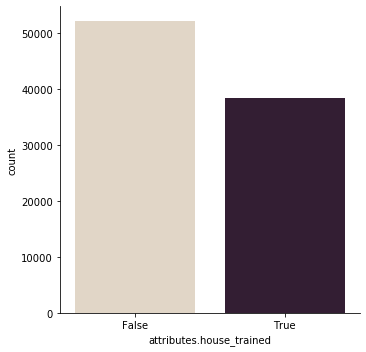

In [184]:
sns.catplot(x="attributes.house_trained", kind="count", palette="ch:.25", data=total);

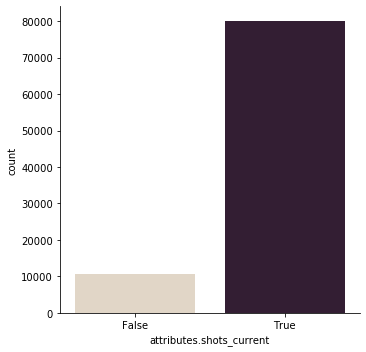

In [185]:
sns.catplot(x="attributes.shots_current", kind="count", palette="ch:.25", data=total);

In [250]:
from sklearn.model_selection import train_test_split
#trainval_X, test_X, trainval_y, test_y = train_test_split(X, y, test_size=0.2)
#use log_adpt_time as feature
trainval_X, test_X, trainval_y, test_y = train_test_split(X, total['log_adpt_time'], test_size=0.2)
print('Training set size = {} and Test set size = {}'.format(len(trainval_X),len(test_X)))

KeyError: 'log_adpt_time'

In [69]:
X.head()

,age,gender,size,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.shots_current,contact.address.state
0,Baby,Female,Small,True,True,True,True,CA
1,Young,Male,Small,False,True,True,True,CA
2,Young,Male,Medium,False,True,False,True,CA
3,Adult,Female,Medium,False,True,False,True,CA
4,Young,Male,Medium,True,True,False,True,CA


In [70]:
total_test = pd.concat([test_X,test_y], axis=1)

In [71]:
export = total_test.to_csv('./data/test_set_scoped_A1.csv', header=True, index = False)

In [72]:
total_trainval = pd.concat([trainval_X,trainval_y], axis=1)

In [73]:
export = total_trainval.to_csv('./data/trainval_set_scoped_A1.csv', header=True, index = False)

In [147]:
#from scipy import stats

In [169]:
#bc_adpt_time,lmbda = stats.boxcox((total['adoption_time']+1))

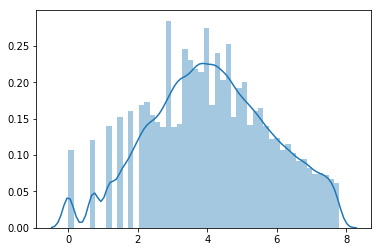

In [170]:
#sns.distplot(bc_adpt_time)

In [171]:
#lmbda

0.13720434611179522

In [172]:
#from scipy.special import boxcox,inv_boxcox

[Text(0, 0.5, 'count'), Text(0.5, 0, 'transformed time')]

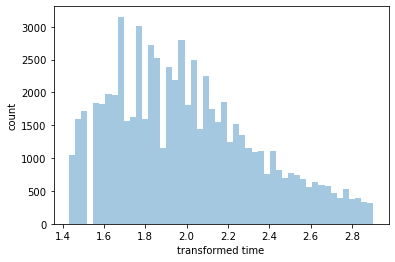

In [251]:
tf_adpt_time = total.apply(lambda x: np.power(((x['adoption_time'])+6),(0.2)), axis=1)
ax = sns.distplot(tf_adpt_time, kde=False)
ax.set(xlabel='transformed time', ylabel='count')

In [86]:
total.head()

,age,gender,size,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state,adoption_time
0,Baby,Female,Small,True,True,True,False,True,CA,19
1,Young,Male,Small,False,True,True,False,True,CA,29
2,Young,Male,Medium,False,True,False,False,True,CA,18
3,Adult,Female,Medium,False,True,False,False,True,CA,57
4,Young,Male,Medium,True,True,False,False,True,CA,8


In [87]:
len(X)

153436

In [252]:
total['mod_adpt_time'] = total.apply(lambda x: np.power(((x['adoption_time'])+6),(0.2)), axis=1)

In [186]:
from sklearn.model_selection import train_test_split
#trainval_X, test_X, trainval_y, test_y = train_test_split(X, y, test_size=0.2)
#use log_adpt_time as feature
trainval_X, test_X, trainval_y, test_y = train_test_split(X, total['cg_adpt_time'], test_size=0.2)
print('Training set size = {} and Test set size = {}'.format(len(trainval_X),len(test_X)))

Training set size = 72502 and Test set size = 18126


In [187]:
total_test = pd.concat([test_X,test_y], axis=1)
export = total_test.to_csv('./data/test_set_scoped_cg.csv', header=True, index = False)
total_trainval = pd.concat([trainval_X,trainval_y], axis=1)
export = total_trainval.to_csv('./data/trainval_set_scoped_cg.csv', header=True, index = False)